In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import mglearn

# Nive Bayes

+ 선형 모델(LogisticRegression, LinearSVC...)과 유사 
+ 훈련속도는 빠르지만 일반화 성능이 조금 뒤쳐진다.
+ 종류
    - GaussianNB : 연속적인 데이터
    - BernoulliNB : 이산 데이터
    - MutinomialNB : 이산 데이터 ##이산데이터는 텍스트 분석시 자주 사용
    
+ 파라미터
    - alpha

In [ ]:
#조건부 확률

## 가우시안 나이브 베이즈

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
model = GaussianNB().fit(X_train, y_train)

In [25]:
pred = model.predict(X_test)

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [27]:
accuracy_score(y_test, pred)

0.9666666666666667

In [28]:
confusion_matrix(y_test, pred)

array([[ 7,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 12]], dtype=int64)

### 다항분포 나이브베이즈(MutinomialNB)

+ 영화 리뷰를 이용한 평가 예측(부정/긍정)

In [29]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [30]:
# type특성을 숫자로 매핑
df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [33]:
# x, y값 분리
df_x = df["movie_review"]
df_y = df["label"]

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
x_traincv

encoded_input = x_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [36]:
#  데이터를 역으로 돌림
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [37]:
# 37개의 단어
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
# 훈련
mnb = MultinomialNB().fit(x_traincv, df_y)

In [40]:
# 텍스트 데이터 
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_x = test_df["movie_review"]
test_y = test_df["label"]

In [41]:
# 문자를 숫자로 변환
x_testcv = cv.transform(test_x)

# 예측
pred = mnb.predict(x_testcv)

In [42]:
# 정확도
accuracy_score(test_y, pred)

1.0

### 베르누이 나이브 베이즈

+ 스팸메일

In [43]:
from sklearn.naive_bayes import BernoulliNB

In [48]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]


In [49]:
test_df = pd.DataFrame(email_list)
test_df["label"] = test_df["spam"].map({"True":1, "False":0})
test_x = test_df["movie_review"]
test_y = test_df["label"]

KeyError: 'movie_review'

In [46]:
x_testcv = cv.transform(test_x)

In [ ]:
pred = mnb.predict(x_testcv)

In [ ]:
accuracy_score(test_y, pred)

--- 
# K-MEANS

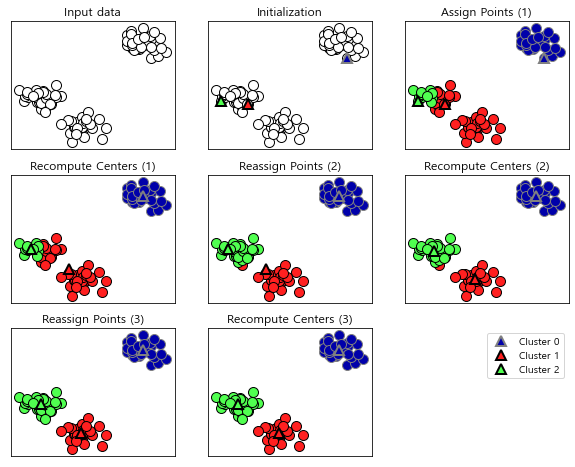

In [50]:
mglearn.plots.plot_kmeans_algorithm()

#### make_blobs() 샘플 사용

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [52]:
X, y = make_blobs()

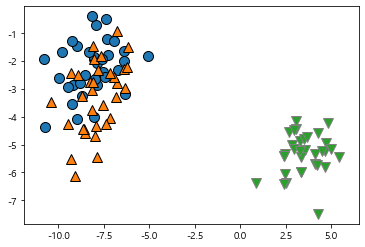

In [53]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [54]:
# 데이터 준비 후, 몇개로 분류할 것인지 정함
km = KMeans(n_clusters=3).fit(X)

In [55]:
# 스스로 label 생성
lbl = km.labels_

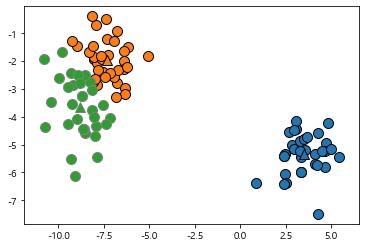

In [56]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers="o")
mglearn.discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], [0, 1, 2], markers="^")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 100

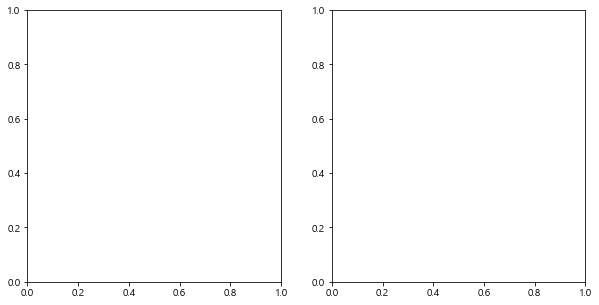

In [57]:
# 집단의 갯수를 2와 5개로 바꾸었을때
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

idx = 0
for k in [2, 5]:
    km = KMeans(n_clusters=k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:, 0], X[: 1], lbl, ax=axes[idx])
    idx += 1

#### make_moons 샘플 활용

In [58]:
from sklearn.datasets import make_moons 

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

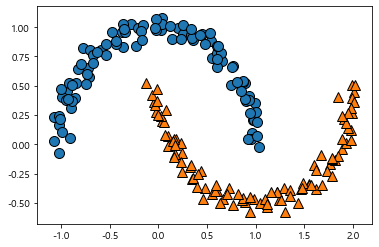

In [59]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [60]:
# 훈련
km = KMeans(n_clusters=2).fit(X)

In [61]:
# lbl = km.labels_
pred = km.predict(X)
pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

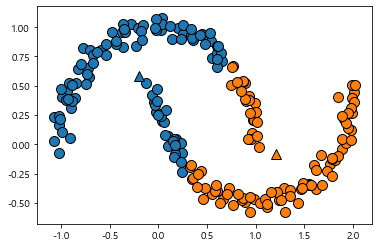

In [62]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], pred, markers="o")
mglearn.discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], [0, 1], markers="^")

In [63]:
# 성능검사
#accuracy_score(pred, km.labels_)
accuracy_score(pred, y)

0.755

#### iris 샘플 적용

In [64]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

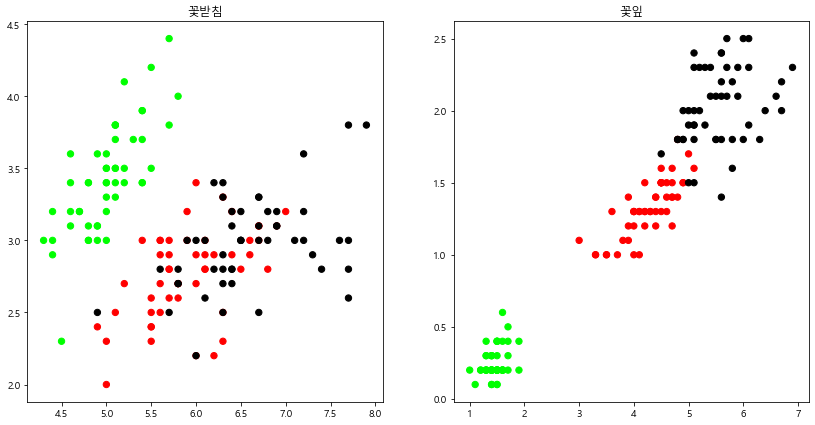

In [65]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

In [66]:
km = KMeans(n_clusters=3).fit(X)

In [67]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Text(0.5, 1.0, '예측결과')

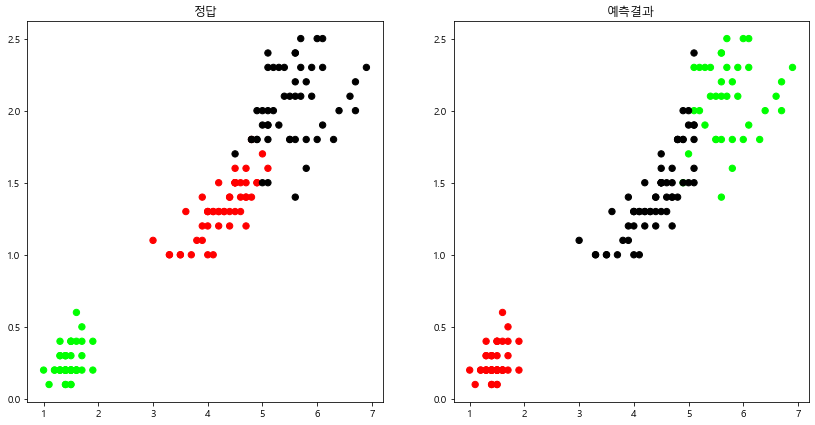

In [68]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[km.labels_], s=40)
plt.title("예측결과")

In [69]:
# 정확도
accuracy_score(y, km.labels_)

0.09333333333333334

In [70]:
# 오차표
confusion_matrix(y, km.labels_)

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]], dtype=int64)

#### 사람의 키와 몸무게 데이터 활용

In [73]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]

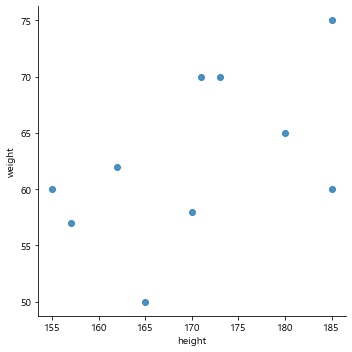

In [75]:
sns.lmplot("height", "weight", data=df, fit_reg=False)

In [76]:
km = KMeans(n_clusters=3).fit(df.values)

In [77]:
df["label"] = km.labels_
df

,height,weight,label
0,185,60,1
1,180,65,1
2,185,75,1
3,165,50,0
4,170,58,0
5,155,60,0
6,157,57,0
7,162,62,0
8,173,70,2
9,171,70,2


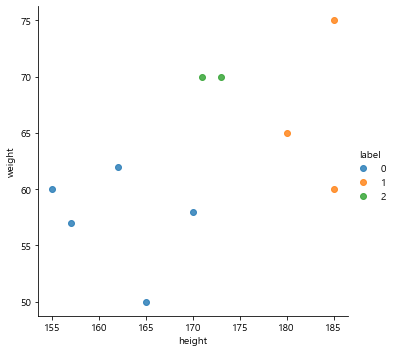

In [78]:
sns.lmplot("height", "weight", data=df, fit_reg=False, hue="label")

---
# 타이타닉을 이용한 알고리즘 성능 비교

### 1. Prepare Data
- https://www.kaggle.com/c/titanic

In [71]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


### 2. EDA(탐색적 데이터 분석)

In [83]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [80]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          0 non-null      float64
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        0 non-null      float64
 10  Embarked     0 non-null      float64
 11  Title        891 non-null    int64  
 12  cabin        0 non-null      float64
dtypes: float64(6), int64(6), object(1)
memory usage: 90.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

In [ ]:
"""
- Pclass(객실등급)
- Sex
- SibSp(동승자 여부)
- Perch 
- Embarked(정박지)
    C : Cherbourg
    Q : Queenstown
    S : Southampton
- Cabin 
"""

In [72]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

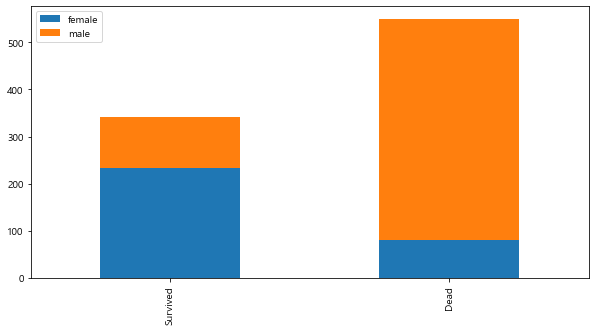

In [73]:
bar_chart("Sex")

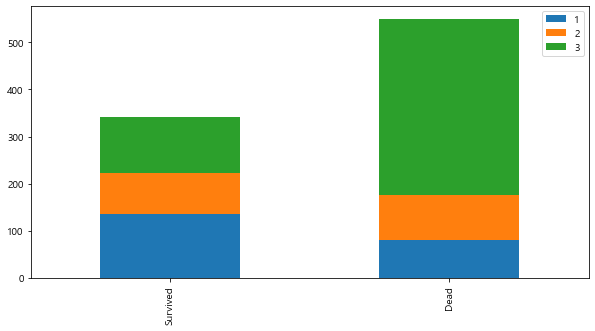

In [103]:
bar_chart("Pclass")

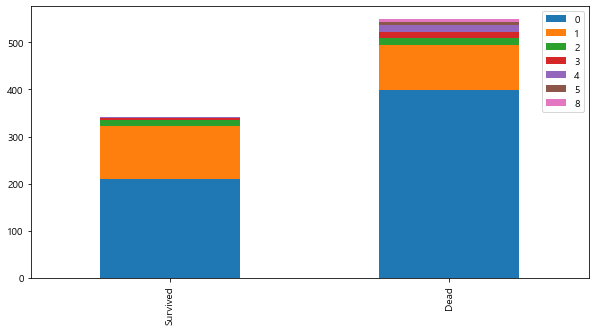

In [104]:
bar_chart("SibSp")

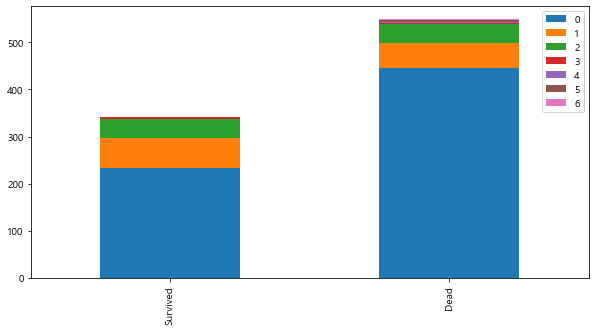

In [105]:
bar_chart("Parch")

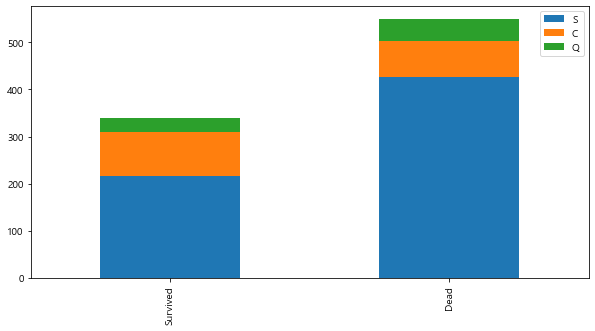

In [107]:
bar_chart("Embarked")

### 3. Feature Engineering

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1) Name 컬럼을 이용하여 호칭(Mr, Mrs, Miss)을 추출

In [76]:
# train, test 데이터 합치기 
train_test_data = [train, test]

for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\. ")

KeyError: 'Name'

In [77]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Don           1
Ms            1
Capt          1
Lady          1
Countess      1
Jonkheer      1
Mme           1
Name: Title, dtype: int64
0    240
1     78
2     72
3     28
Name: Title, dtype: int64


In [78]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Major":3, "Col":3, "Mlle":3, 
                 "Don":3, "Jonkheer":3, "Mme":3, "Ms":3, "Sir":3, "Capt":3, "Countess":3, "Lady":3, 
                 "Dona":3}

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [79]:
train.head()
train["Title"].value_counts()
test["Title"].value_counts()

Series([], Name: Title, dtype: int64)

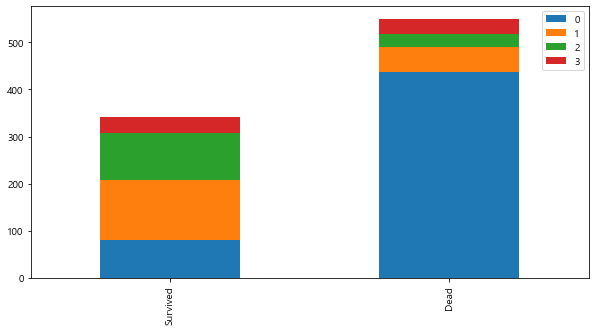

In [80]:
# 그래프로 title 변수 확인
bar_chart("Title")

In [81]:
# Name 컬럼 삭제
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

KeyError: "['Name'] not found in axis"

In [82]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,NaN,1
1,893,3,1,3.0,0.0,2.0,0,NaN,2
2,894,2,0,4.0,0.0,2.0,2,NaN,1
3,895,3,0,2.0,0.0,2.0,0,NaN,1
4,896,3,1,1.0,0.0,2.0,0,NaN,3


#### 2) Sex 데이터의 인코딩

In [83]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})

In [84]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,NaN,2.0,0.0,2.0,2,NaN,1
1,893,3,NaN,3.0,0.0,2.0,0,NaN,2
2,894,2,NaN,4.0,0.0,2.0,2,NaN,1
3,895,3,NaN,2.0,0.0,2.0,0,NaN,1
4,896,3,NaN,1.0,0.0,2.0,0,NaN,3


#### 3) Age 데이터의 Binning

+ child:0, young:1, adult:2, mid_age:3, senior:4
+ child:16세 이하, young:16 ~ 26, adult:26 ~ 36, mid_age:36 ~ 62, senior:62세 이상 

In [85]:
print(train.isnull().sum())
print("----------------------")
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
----------------------
PassengerId      0
Pclass           0
Sex            418
Age              0
Fare             0
Cabin            0
Embarked         0
Title          418
FamilySize       0
dtype: int64


In [86]:
# 결측치 처리 : 평균나이로 대체
# 남성들은 Mr의 평균 나이, Mrs는 Mrs의 평균나이, Miss는 Miss의 평균 나이

#train["Age"].fillna(train.groupby("Title")["Age"].transform("median")).isnull().sum()
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"))
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

#test["Age"].fillna(train.groupby("Title")["Age"].transform("median")).isnull().sum()
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"))
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [87]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex            418
Age              0
Fare             0
Cabin            0
Embarked         0
Title          418
FamilySize       0
dtype: int64

In [88]:
# 나이를 카테고리 별로 
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[(dataset["Age"]>=62), "Age"] = 4

In [17]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


#### 4) Embarked 데이터의 결측치 처리, 인코딩

In [89]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [90]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [91]:
train["Embarked"].fillna("S", inplace=True)

In [92]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [93]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2})

In [94]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


#### 5) Fare 데이터의 결측치 처리, Binning

+ 17달러 이하면 0, 18 ~ 30은 1, 31 ~ 100은 2, 그 이상은 3으로 설정

In [95]:
#test["Fare"] = test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"))
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [96]:
test["Fare"].isnull().sum()

0

In [97]:
# 요금을 카테고리 별로 
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<=17, "Fare"] = 0
    dataset.loc[(dataset["Fare"]>17) & (dataset["Fare"]<=30), "Fare"] = 1
    dataset.loc[(dataset["Fare"]>30) & (dataset["Fare"]<=100), "Fare"] = 2
    dataset.loc[(dataset["Fare"]>100), "Fare"] = 3

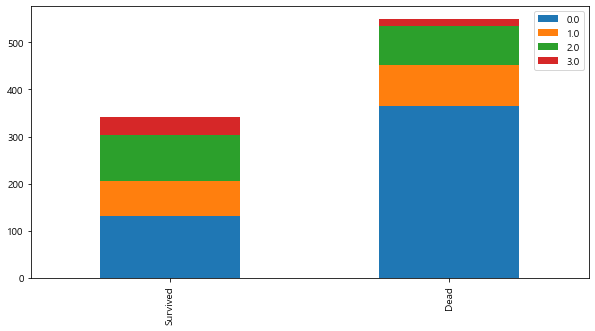

In [98]:
bar_chart("Fare")

#### cabin 데이터 처리

In [99]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F33            3
              ..
C86            1
D45            1
D46            1
B78            1
B101           1
Name: Cabin, Length: 147, dtype: int64

In [100]:
# 앞의 알파벳 하나씩 꺼내오기
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

AttributeError: Can only use .str accessor with string values!

In [101]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


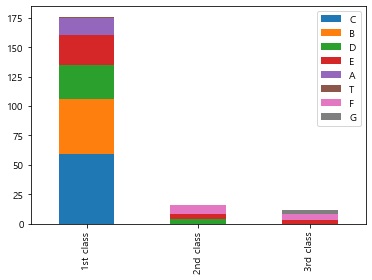

In [102]:
# Pclass와 Cabin 간의 관계 확인
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind="bar", stacked=True)

In [103]:
# 알파벳을 숫자로 인코딩
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [104]:
train["Cabin"].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [105]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [106]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [107]:
train["Cabin"].isnull().sum()
test["Cabin"].isnull().sum()

418

In [108]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


#### 7) 동승자 컬럼 합치기 

In [109]:
# SibSp와 Parch를 FamilySize로 합치기
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

KeyError: 'SibSp'

In [110]:
train["FamilySize"].value_counts()
test["FamilySize"].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

#### 8) 필요없는 컬럼 삭제

In [111]:
feature_drop = ["Ticket", "SibSp", "Parch"]
train = train.drop(feature_drop, axis =1 )
test = test.drop(feature_drop, axis =1 )

KeyError: "['Ticket' 'SibSp' 'Parch'] not found in axis"

In [112]:
train.head()
#test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,2
1,2,1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,3,1,2.0,0.0,2.0,0,1,1
3,4,1,1,1,2.0,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0.0,2.0,0,0,1


In [113]:
# 훈련 데이터에는 PassengerId 제외하고 Survived 따로 분리 후, 독립변수들로만 구성
train = train.drop(["PassengerId"], axis=1)

In [114]:
X = train.drop(["Survived"], axis=1)
y = train["Survived"]

In [115]:
print(X.shape, y.shape)

(891, 8) (891,)


In [116]:
# 체크 포인트
X.to_csv("data/titanic/train_data.csv", index=False)
y.to_csv("data/titanic/target_data.csv", index=False)

test.to_csv("data/titanic/test.csv", index=False)

### 3. Modeling

+ KNN
+ Decision Tree
+ Random Forest
+ SVM
+ Naive Bayes

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
X = pd.read_csv("data/titanic/train_data.csv")
y = pd.read_csv("data/titanic/target_data.csv")

In [117]:
X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [118]:
# cross_val_score로 kfold를 넘겨줄 예정, 데이터를 번갈아가며 fitting
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [119]:
# KNN
knnclf = KNeighborsClassifier(n_neighbors=26)
score = cross_val_score(knnclf, X, np.ravel(y), cv=kfold, scoring="accuracy")

print(score)
round(np.mean(score)*100, 2)

[0.82222222 0.82022472 0.83146067 0.82022472 0.83146067 0.82022472
 0.82022472 0.79775281 0.83146067 0.82022472]


82.15

In [120]:
# Decision Tree
dtclf = DecisionTreeClassifier()
score = cross_val_score(dtclf, X, np.ravel(y), cv=kfold, scoring="accuracy")

print(score)
round(np.mean(score)*100, 2)

[0.78888889 0.88764045 0.76404494 0.7752809  0.86516854 0.78651685
 0.80898876 0.79775281 0.74157303 0.80898876]


80.25

In [121]:
# RandomForest
rfclf = RandomForestClassifier(n_estimators=300)
score = cross_val_score(rfclf, X, np.ravel(y), cv=kfold, scoring="accuracy")

print(score)
round(np.mean(score)*100, 2)

[0.82222222 0.85393258 0.79775281 0.79775281 0.86516854 0.84269663
 0.82022472 0.80898876 0.76404494 0.84269663]


82.15

In [122]:
# NaiveBayes
nbclf = GaussianNB()
score = cross_val_score(nbclf, X, np.ravel(y), cv=kfold, scoring="accuracy")

print(score)
round(np.mean(score)*100, 2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78

In [123]:
# SVM
svclf = SVC()
score = cross_val_score(svclf, X, np.ravel(y), cv=kfold, scoring="accuracy")

print(score)
round(np.mean(score)*100, 2)

[0.83333333 0.78651685 0.82022472 0.82022472 0.84269663 0.80898876
 0.82022472 0.84269663 0.83146067 0.85393258]


82.6

### 4. Testing

In [124]:
test.head()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex            418
Age              0
Fare             0
Cabin          418
Embarked       418
Title          418
FamilySize       0
dtype: int64

In [125]:
clf = SVC()
clf.fit(X, y)

SVC()

In [126]:
# 훈련결과(clf, PassengerId 제외)를 테스트 데이터로.. 깊은 복사
test_data = test.drop("PassengerId", axis=1).copy()

In [127]:
test_data.head()

# test 데이터(원본)에는 PassengerId가 그대로 있어야함
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,NaN,0.0,0.0,NaN,NaN,NaN,1
1,893,3,NaN,0.0,0.0,NaN,NaN,NaN,2
2,894,2,NaN,0.0,0.0,NaN,NaN,NaN,1
3,895,3,NaN,0.0,0.0,NaN,NaN,NaN,1
4,896,3,NaN,0.0,0.0,NaN,NaN,NaN,3


In [131]:
pred = clf.predict(test_data)

In [135]:
# kaggle 업로드 형식 맞추기
submission = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":pred})
submission.head()

ValueError: array length 200 does not match index length 418

In [129]:
submission.to_csv("data/titanic/submission.csv", index=False)

NameError: name 'submission' is not defined